# Linear Regression

## import Libraries

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Load the bostan Dataset

In [62]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
X = boston.data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**So here The dataset is all about Predict the house price based on the 13 Criteria Our House price will predicted here 24 is all about 
$24000**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## So we want To Summarize the data

In [13]:
from pandas_profiling import ProfileReport

In [14]:
pf = ProfileReport(df)

In [15]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

1. There is No Null Values
2. RM , DIS is highly correlated with Target
3. LSTAT is inverse correlated with target

## Handle the Distribution 

In [63]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

## First we Scale the value  and Handle the data

In [64]:
x = df.drop(['target'] , axis = 1)
y = df.target

In [65]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [66]:
col = x.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [67]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [68]:
scaled_array  = scalar.fit_transform(x)
scaled_array[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [70]:
df_scaled = pd.DataFrame(scaled_array , columns= col)
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [34]:
scale_pf = ProfileReport(df_scaled)

In [35]:
scale_pf.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Now our Dataset is Skewd we want Handle

In [71]:
df_scaled.CRIM.skew()

5.223148798243851

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

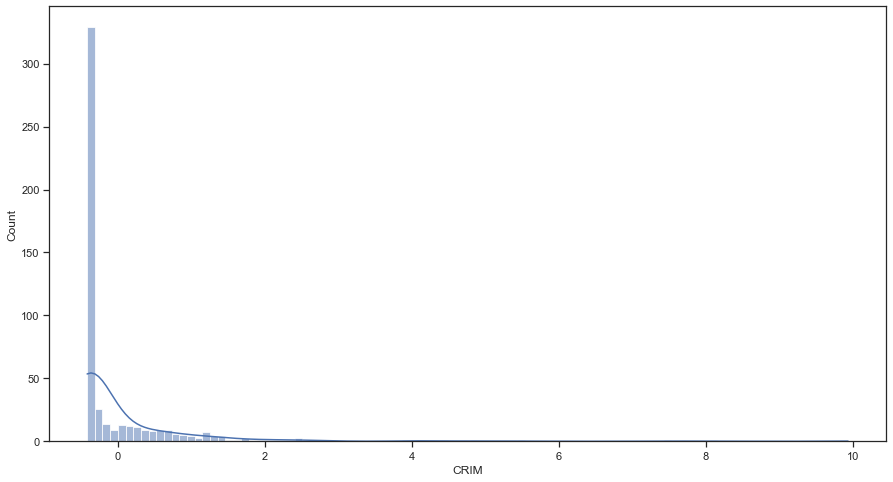

In [72]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.histplot(data = df_scaled ,x = 'CRIM' , kde=True )


So now it is not normal distribution now we want to handel

In [74]:
df_scaled["crim_log"] = np.log(df.CRIM)

In [75]:
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-5.064036
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-3.600502
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-3.601235
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-3.430523
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-2.672924


In [76]:
#df_scaled["crim_log"] = np.log(df.CRIM)
df_scaled.crim_log.skew()

0.4059344988496048

<AxesSubplot:xlabel='crim_log', ylabel='Count'>

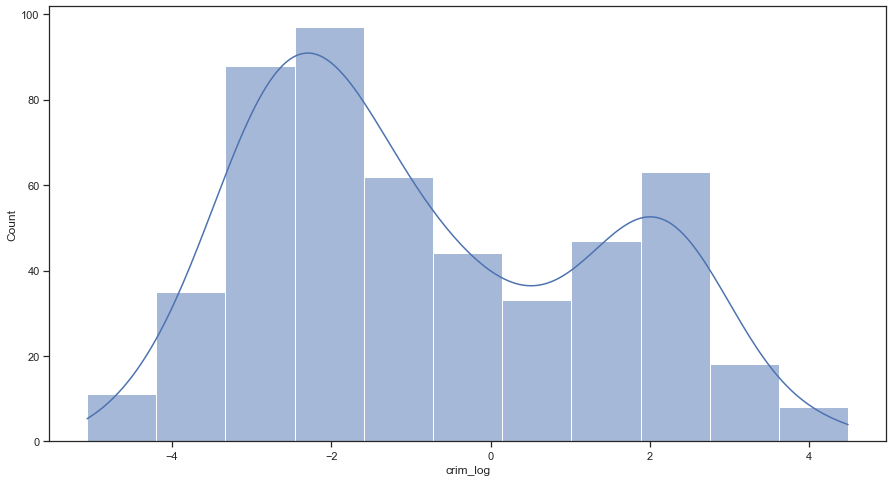

In [78]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.histplot(data = df_scaled ,x = 'crim_log' , kde=True )

In [80]:
## now we handle ade 
df_scaled.skew()

CRIM        5.223149
ZN          2.225666
INDUS       0.295022
CHAS        3.405904
NOX         0.729308
RM          0.403612
AGE        -0.598963
DIS         1.011781
RAD         1.004815
TAX         0.669956
PTRATIO    -0.802325
B          -2.890374
LSTAT       0.906460
crim_log    0.405934
dtype: float64

## So others are comparively okay

In [81]:
## drop the crim column
df_scaled = df_scaled.drop(['CRIM'] , axis = 1)

In [82]:
df_scaled.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-5.064036
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-3.600502
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-3.601235
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-3.430523
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-2.672924


## check the collinearity

<AxesSubplot:>

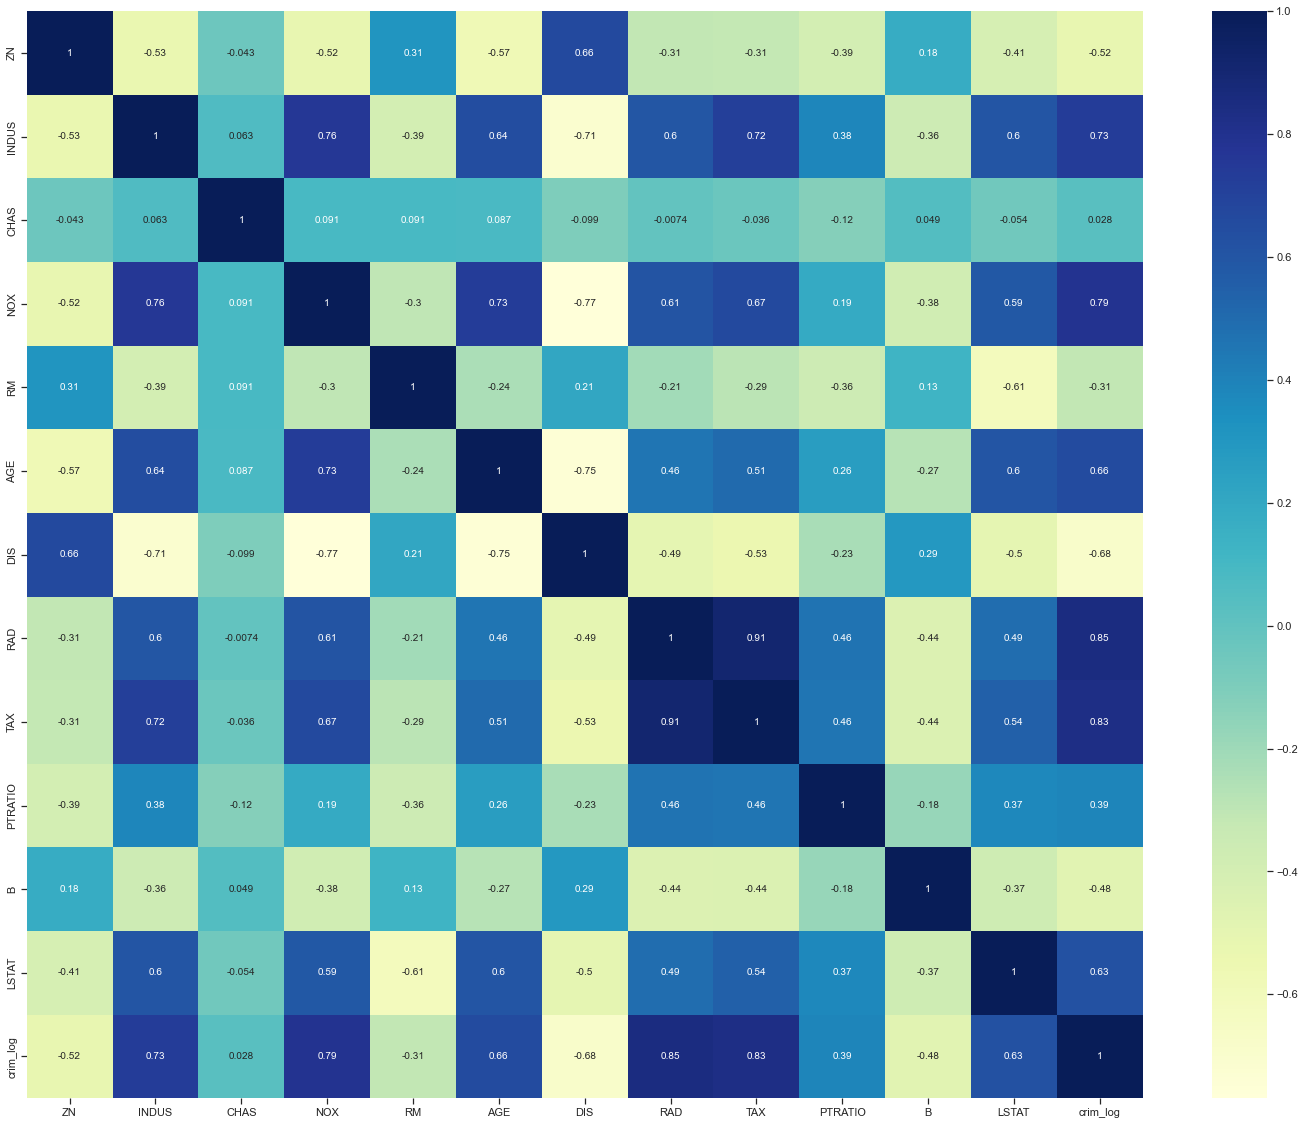

In [87]:
plt.figure(figsize=(25,20))
sns.heatmap(df_scaled.corr(), cmap="YlGnBu", annot=True)

In [92]:
df_scaled.corr()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
ZN,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.517091
INDUS,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.730821
CHAS,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.028496
NOX,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.788616
RM,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.306943
AGE,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.658284
DIS,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.681903
RAD,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.853407
TAX,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.828234
PTRATIO,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,0.389554


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
vif_df = pd.DataFrame()
vif_df["VIF Score"] = [variance_inflation_factor(scaled_array,i)for i in range(scaled_array.shape[1])]
vif_df["Feature Names"] =x.columns
vif_df ## everything is lesser than 10 so we dont drop any column 

,VIF Score,Feature Names
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Now we see all the features are below 10 so we dont need too drop the features

In [95]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [97]:
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [101]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'target ~ TAX+CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+B+LSTAT' , data = df).fit()  ## this "~" symbol is must
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        08:15:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now we see Indus and Age Significance value are too low Simply we can drop this feature

In [103]:
x_features = df_scaled.drop(['AGE' , 'INDUS'] , axis = 1)

In [104]:
x_features.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
0,0.284830,-0.272599,-0.144217,0.413672,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-5.064036
1,-0.487722,-0.272599,-0.740262,0.194274,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-3.600502
2,-0.487722,-0.272599,-0.740262,1.282714,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-3.601235
3,-0.487722,-0.272599,-0.835284,1.016303,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-3.430523
4,-0.487722,-0.272599,-0.835284,1.228577,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-2.672924


In [105]:
xm = smf.ols(formula = 'target ~ TAX+CRIM+ZN+CHAS+NOX+RM+DIS+RAD+PTRATIO+B+LSTAT' , data = df).fit()  ## this "~" symbol is must
xm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          5.54e-137
Time:                        08:20:59   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
## So our Final x feature was 
x_features.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
0,0.284830,-0.272599,-0.144217,0.413672,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-5.064036
1,-0.487722,-0.272599,-0.740262,0.194274,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-3.600502
2,-0.487722,-0.272599,-0.740262,1.282714,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-3.601235
3,-0.487722,-0.272599,-0.835284,1.016303,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-3.430523
4,-0.487722,-0.272599,-0.835284,1.228577,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-2.672924


## Final Scale

In [112]:
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [113]:
df_dummy = df.drop(['INDUS' , 'AGE' , 'target'] , axis = 1)

In [114]:
df_dummy.head(1)

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.09,1.0,296.0,15.3,396.9,4.98


In [115]:
df_dummy['crim_log'] = np.log(df.CRIM)

In [117]:
df_dummy.head(1)

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
0,0.00632,18.0,0.0,0.538,6.575,4.09,1.0,296.0,15.3,396.9,4.98,-5.064036


In [118]:
df_dummy = df_dummy.drop(['CRIM'] , axis = 1)

In [119]:
df_dummy.head(1)

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
0,18.0,0.0,0.538,6.575,4.09,1.0,296.0,15.3,396.9,4.98,-5.064036


In [121]:
import pickle

In [127]:
final_scale = StandardScaler()
final_scale.fit_transform(df_dummy)
pickle.dump(final_scale , open("Scalar_Model.pickle","wb")) 


## Now we split the dataset

In [108]:
x_features.shape

(506, 11)

In [107]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y, test_size=0.10, random_state=42)

In [110]:
X_test.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
173,-0.487722,-0.272599,-0.386091,0.187151,-0.546077,-0.523001,-0.666608,-0.857929,0.425702,-0.506457,-2.388361
274,1.229060,3.668398,-0.930305,0.674384,0.134319,-0.637962,-0.916058,-0.395567,0.441052,-1.278814,-2.874577
491,-0.487722,-0.272599,0.469104,-0.429726,-0.916009,-0.637962,1.798194,0.760340,0.366604,0.759313,-2.246772
72,-0.487722,-0.272599,-1.224009,-0.312904,0.709373,-0.637962,-0.613155,0.344213,0.375375,-0.999868,-2.389887
452,-0.487722,-0.272599,1.367490,0.017617,-0.678277,1.661245,1.530926,0.806576,0.311563,0.647173,1.627311


In [111]:
len(X_train) , len(X_test)

(455, 51)

## test our Scalar file

In [128]:
test = pickle.load(open('Scalar_Model.pickle','rb'))
test.transform([[18.0 , 0.0 , 0.538 , 6.575 , 4.09 , 1.0 , 296.0 , 15.3 , 396.9 , 4.98 , -5.064036]])

array([[ 0.28482986, -0.27259857, -0.14421743,  0.41367189,  0.1402136 ,
        -0.98284286, -0.66660821, -1.45900038,  0.44105193, -1.0755623 ,
        -1.98322809]])

## now we build the model

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [144]:
lr.fit(X_train , y_train)

LinearRegression()

In [145]:
lr.score(X_test , y_test)

0.7776947440216896

In [146]:
y_test[0:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [147]:
X_test.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,crim_log
173,-0.487722,-0.272599,-0.386091,0.187151,-0.546077,-0.523001,-0.666608,-0.857929,0.425702,-0.506457,-2.388361
274,1.229060,3.668398,-0.930305,0.674384,0.134319,-0.637962,-0.916058,-0.395567,0.441052,-1.278814,-2.874577
491,-0.487722,-0.272599,0.469104,-0.429726,-0.916009,-0.637962,1.798194,0.760340,0.366604,0.759313,-2.246772
72,-0.487722,-0.272599,-1.224009,-0.312904,0.709373,-0.637962,-0.613155,0.344213,0.375375,-0.999868,-2.389887
452,-0.487722,-0.272599,1.367490,0.017617,-0.678277,1.661245,1.530926,0.806576,0.311563,0.647173,1.627311


In [148]:
df.iloc[173]

CRIM         0.09178
ZN           0.00000
INDUS        4.05000
CHAS         0.00000
NOX          0.51000
RM           6.41600
AGE         84.10000
DIS          2.64630
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          395.50000
LSTAT        9.04000
target      23.60000
Name: 173, dtype: float64

In [149]:
lr.predict([[1.229060 , 3.668398 ,  -0.930305 , 0.674384 , 0.134319 , -0.637962 , -0.916058 , -0.395567 , 0.441052 , -1.278814 , -2.87457]])

array([36.33546975])

In [150]:
lr.score(X_train , y_train)

0.7313168419621766

In [153]:
linear_score = lr.score(X_test , y_test)
linear_score

0.7776947440216896

## Now we Regularization

In [154]:
from sklearn.linear_model import Lasso , LassoCV , Ridge , RidgeCV , ElasticNet , ElasticNetCV

## Lasso

In [155]:
lassocv = LassoCV(alphas=None , cv=30 , max_iter=20000000 , normalize=True )
lassocv

LassoCV(cv=30, max_iter=20000000, normalize=True)

In [156]:
lassocv.fit(X_train , y_train)
lassocv.alpha_     ##alpha value
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train , y_train)
lassoscore = lasso.score(X_test , y_test)
lassoscore

0.777690370223021

## ridge

In [157]:
alpha = np.random.uniform(0 , 10 ,100)
ridgecv = RidgeCV( alphas=alpha , cv = 10 , normalize=True) 
print(ridgecv)
ridgecv.fit(X_train , y_train)
print(ridgecv.alpha_)
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train , y_train)
ridge_score = ridge.score(X_test , y_test)
ridge_score

RidgeCV(alphas=array([2.83046098, 0.48327602, 9.8812217 , 5.50505332, 5.08087165,
       0.68128066, 3.42179975, 6.89718911, 1.30325325, 8.71428689,
       4.19506347, 4.21111025, 9.66706769, 4.30860366, 6.91690746,
       8.20248865, 0.65051466, 8.74024881, 8.92903655, 5.93513092,
       1.66226165, 6.39229083, 3.32647987, 4.19688783, 8.70038266,
       0.96465194, 5.92569233, 1.10039858, 1.01830616, 6.22576578...
       5.97085893, 6.77338963, 1.40700329, 8.50833571, 0.65452835,
       8.0110555 , 4.00915983, 0.53554665, 4.80666258, 5.70722277,
       6.69111437, 6.06328881, 9.3015148 , 9.46606902, 4.94294561,
       9.43962263, 3.42323776, 1.33540122, 6.30634702, 1.66782792,
       8.48504518, 6.18889512, 6.71878939, 2.64789781, 4.23473581,
       6.17735028, 4.1012905 , 3.07043224, 8.07223835, 2.57798885]),
        cv=10, normalize=True)
0.09764706830366232


0.777715644202896

## ElasticNet

In [158]:
elastic = ElasticNetCV(alphas=None , cv = 10 , normalize=True)
elastic
elastic.fit(X_train , y_train)
print(elastic.alpha_ , elastic.l1_ratio)
elas = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio)
elas
elas.fit(X_train , y_train)
elastic_score = elas.score(X_test , y_test)
elastic_score

0.000642180848823096 0.5


0.7777213119757382

In [159]:
scores = {
    "LinearRegression" : linear_score , 
    "Lassoregression" : lassoscore ,
    "Ridgeregression" : ridge_score ,
    "ElasticRegression" : elastic_score
}
scores

{'LinearRegression': 0.7776947440216896,
 'Lassoregression': 0.777690370223021,
 'Ridgeregression': 0.777715644202896,
 'ElasticRegression': 0.7777213119757382}

In [160]:
Keymax = max(zip(scores.values() , scores.keys()))
print(Keymax)

(0.7777213119757382, 'ElasticRegression')


In [161]:
pickle.dump( lasso , open("ElasticModel.pickle" , "wb"))

In [162]:
pf.to_file("report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [166]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [167]:
pik = pickle.load(open('ElasticModel.pickle' , 'rb'))

In [169]:
a=pik.predict([[1.229060 , 3.668398 ,  -0.930305 , 0.674384 , 0.134319 , -0.637962 , -0.916058 , -0.395567 , 0.441052 , -1.278814 , -2.87457]])

In [170]:
a[0]

36.33157254100189